In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import warnings as war

In [3]:
train=pd.read_csv('Loan_Modelling.csv')
train.head(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
train.lt(0).any()

ID                    False
Age                   False
Experience             True
Income                False
ZIPCode               False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal_Loan         False
Securities_Account    False
CD_Account            False
Online                False
CreditCard            False
dtype: bool

In [5]:
train.loc[train['Experience']<0,'Experience']=0
train.lt(0).any()

ID                    False
Age                   False
Experience            False
Income                False
ZIPCode               False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal_Loan         False
Securities_Account    False
CD_Account            False
Online                False
CreditCard            False
dtype: bool

In [6]:
train.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
train.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


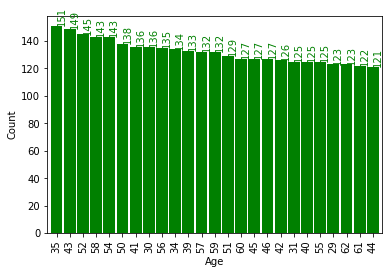

In [10]:
s=train['Age'].value_counts().head(25)
ax=s.plot.bar(width=0.9,color="Green") 
plt.xlabel("Age")
plt.ylabel("Count")
for i, v in s.reset_index().iterrows():
    ax.text(i, v.Age + 1.5, v.Age, color='green',rotation=90)

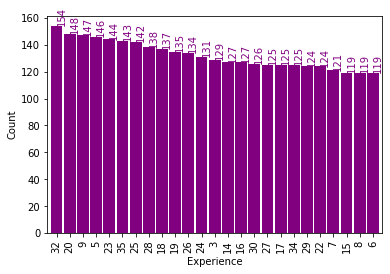

In [11]:
s=train['Experience'].value_counts().head(25)
ax=s.plot.bar(width=.9,color="Purple") 
plt.xlabel("Experience")
plt.ylabel("Count")
for i, v in s.reset_index().iterrows():
    ax.text(i, v.Experience + 1.5, v.Experience, color='Purple',rotation=90)

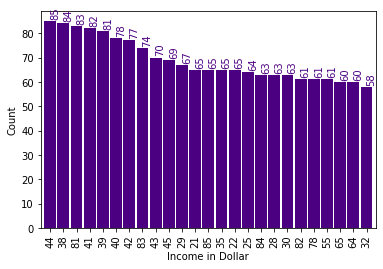

In [13]:
s=train['Income'].value_counts().head(25)
ax=s.plot.bar(width=.9,color="Indigo") 
plt.xlabel("Income in Dollar")
plt.ylabel("Count")
for i, v in s.reset_index().iterrows():
    ax.text(i, v.Income + 1.5, v.Income, color='Indigo',rotation=90)

<AxesSubplot:xlabel='Personal_Loan', ylabel='Income'>

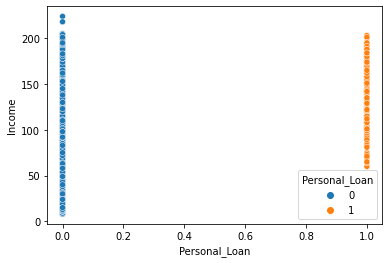

In [17]:
sb.scatterplot(x="Personal_Loan",y="Income",data=train,hue="Personal_Loan")

In [18]:
maxii=train.loc[(train['Personal_Loan']==1),'Income'].max()
minii=train.loc[(train['Personal_Loan']==1),'Income'].min()
print(maxii)
print(minii)

203
60


<AxesSubplot:xlabel='Age', ylabel='Experience'>

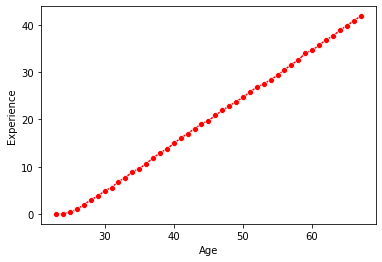

In [19]:
sb.lineplot(x="Age",y="Experience",data=train,marker='.',markersize=12,ci=None,color='red')

<AxesSubplot:xlabel='Experience', ylabel='Income'>

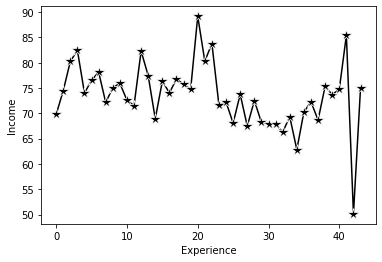

In [20]:
sb.lineplot(x="Experience",y="Income",data=train,color='black',ci=None,marker='*',markersize=12)

<AxesSubplot:xlabel='Age', ylabel='Income'>

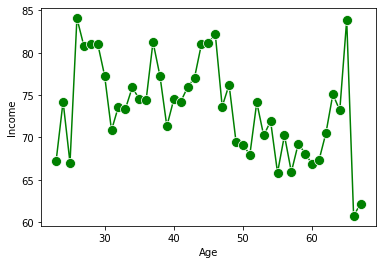

In [21]:
sb.lineplot(x="Age",y="Income",data=train,color='green',ci=None,marker='o',markersize=10)

<AxesSubplot:xlabel='Income', ylabel='Mortgage'>

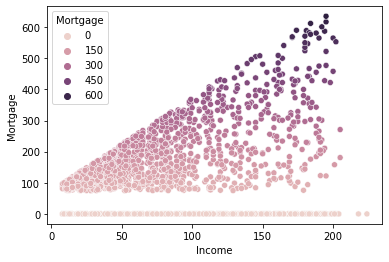

In [22]:
sb.scatterplot(x="Income",y="Mortgage",hue="Mortgage",data=train)

<AxesSubplot:xlabel='Personal_Loan', ylabel='Mortgage'>

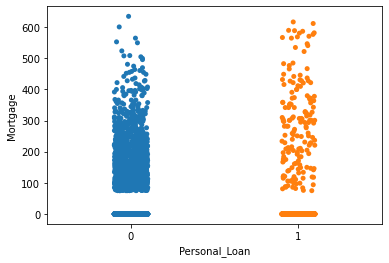

In [25]:
sb.stripplot(x="Personal_Loan",y="Mortgage",data=train)

<AxesSubplot:xlabel='Education', ylabel='Mortgage'>

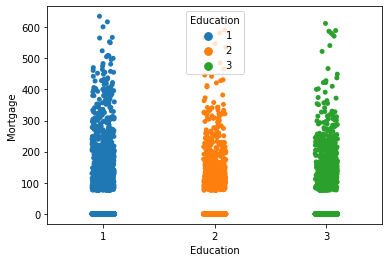

In [26]:
sb.stripplot(x="Education",y="Mortgage",data=train,hue="Education")

<AxesSubplot:xlabel='Family', ylabel='Mortgage'>

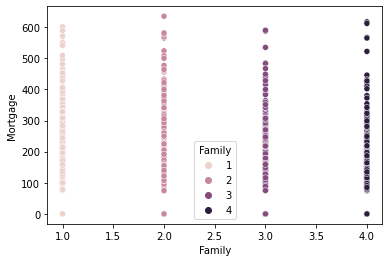

In [27]:
sb.scatterplot(x="Family",y="Mortgage",data=train,hue="Family")

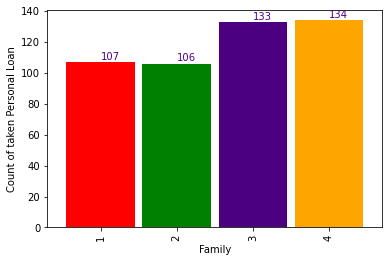

In [28]:
s=train.Family[train['Personal_Loan']==1].value_counts().sort_index()
#ax=plot(kind='bar',alpha=0.5,color="Orange")
col=['Red','Green','Indigo','Orange']
ax=s.plot.bar(width=.9,color=col) 
plt.xlabel("Family")
plt.ylabel("Count of taken Personal Loan")
for i, v in s.reset_index().iterrows():
    ax.text(i, v.Family + 1.5, v.Family, color='Indigo')

In [29]:
train['Active']=0

In [31]:
train.loc[((train['Securities_Account']==1)|(train['CD_Account']==1)|(train['Online']==1)|(train['CreditCard']==1)),'Active']=1

In [32]:
train.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Active
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,1
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,1
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,1


<AxesSubplot:xlabel='Active', ylabel='Income'>

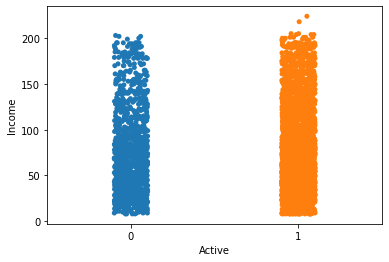

In [33]:
sb.stripplot(y="Income",x="Active",data=train)

In [34]:
train['Response']=0

In [35]:
train.loc[((train['Family']==3)|(train['Family']==4)),'Response']=1
train.head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Active,Response
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,1,1
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,1,1
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,1,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0,1,1
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1,1,0
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0,1,1
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0,0,0


In [36]:
test=pd.DataFrame(train.loc[(((train['Family']==1)|(train['Family']==2))&(train['Mortgage']!=0)),'Mortgage'])

In [37]:
test.head()

,Mortgage
22,260
23,163
24,159
30,122
32,193


In [38]:
test.shape

(859, 1)

<AxesSubplot:xlabel='Mortgage'>

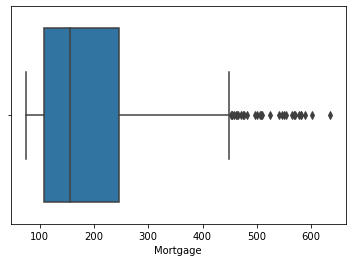

In [39]:
sb.boxplot(x=test['Mortgage'])

In [45]:
Q1 = test.quantile(0.25)
Q3 = test.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Mortgage    136.5
dtype: float64


In [46]:
test = test[~((test < (Q1-1.5 * IQR)) |(test > (Q3 + 1.5 * IQR))).any(axis=1)]

In [47]:
test.shape

(829, 1)

In [48]:
first=Q1-1.5 * IQR
second=Q3 + 1.5 * IQR

In [49]:
print(first)
print(second)

Mortgage   -95.75
dtype: float64
Mortgage    450.25
dtype: float64


<AxesSubplot:xlabel='Mortgage'>

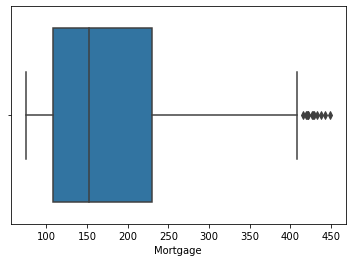

In [50]:
sb.boxplot(x=test['Mortgage'])

In [51]:
train.loc[((train['Mortgage']==0)&(train['Active']==1)),'Response']=1
train.head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Active,Response
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,1,1.0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,1,1.0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,1,1.0
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0,1,NaN
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0,1,1.0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1,1,1.0
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0,1,NaN
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0,0,NaN


In [52]:
train.loc[(((train['Family']==1)&(train['Family']==2))&((train['Mortgage']>=second[0])&(train['Mortgage']<=first[0]))),'Response']=1

In [53]:
train.head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Active,Response
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,1,1.0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,1,1.0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,1,1.0
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0,1,NaN
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0,1,1.0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1,1,1.0
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0,1,NaN
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0,0,NaN


In [54]:
train['Mon_Income']=(train['Income']/12.0)

In [55]:
train.head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Active,Response,Mon_Income
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,1,1.0,4.083333
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,1,1.0,2.833333
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,0,NaN,0.916667
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0,NaN,8.333333
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,1,1.0,3.750000
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0,1,NaN,2.416667
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0,1,1.0,6.000000
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1,1,1.0,1.833333
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0,1,NaN,6.750000
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0,0,NaN,15.000000


In [56]:
train['Ultimate']=(train['Mon_Income']-train['CCAvg'])

In [57]:
train.head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Active,Response,Mon_Income,Ultimate
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,1,1.0,4.083333,2.483333
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,1,1.0,2.833333,1.333333
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,0,NaN,0.916667,-0.083333
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0,NaN,8.333333,5.633333
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,1,1.0,3.750000,2.750000
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0,1,NaN,2.416667,2.016667
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0,1,1.0,6.000000,4.500000
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1,1,1.0,1.833333,1.533333
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0,1,NaN,6.750000,6.150000
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0,0,NaN,15.000000,6.100000


<AxesSubplot:xlabel='Ultimate'>

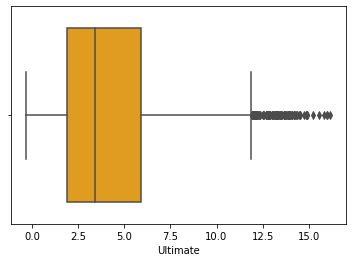

In [58]:
sb.boxplot(x=train['Ultimate'],color='orange')

In [59]:
train['Ultimate'].shape

(5000,)

In [60]:
(train['Response']>0).sum()

2580

In [61]:
tesst=pd.DataFrame(train['Ultimate'])

In [62]:
Q1 = tesst.quantile(0.25)
Q3 = tesst.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Ultimate    4.0
dtype: float64


In [63]:
tesst = tesst[~((tesst < (Q1-1.5 * IQR)) |(tesst > (Q3 + 1.5 * IQR))).any(axis=1)]
tesst.head(10)

,Ultimate
0,2.483333
1,1.333333
2,-0.083333
3,5.633333
4,2.750000
5,2.016667
6,4.500000
7,1.533333
8,6.150000
9,6.100000


In [64]:
fifi=tesst['Ultimate'].max()
sisi=tesst['Ultimate'].min()

<AxesSubplot:xlabel='Ultimate'>

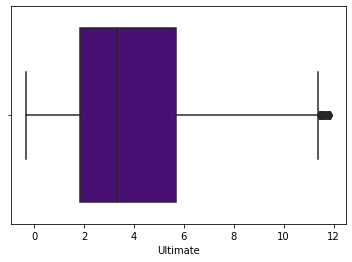

In [65]:
sb.boxplot(x=tesst['Ultimate'],color='indigo')

In [66]:
tesst.shape

(4872, 1)

In [79]:
train.loc[((train['Ultimate']>=fifi)&(train['Ultimate']<=sisi)),'Response']=1

In [83]:
train.head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Active,Mon_Income,Ultimate,Response
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,1,4.083333,2.483333,NaN
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,1,2.833333,1.333333,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,0,0.916667,-0.083333,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0,8.333333,5.633333,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,1,3.750000,2.750000,NaN
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0,1,2.416667,2.016667,NaN
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0,1,6.000000,4.500000,NaN
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1,1,1.833333,1.533333,NaN
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0,1,6.750000,6.150000,NaN
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0,0,15.000000,6.100000,NaN


In [84]:
(train['Response']>0).sum()

0